### Programming for Data Analysis Project

Author: Agnieszka Waszczuk

*** 
This repository is used for the project given by the lecture on Programming for <em><strong> Data Analysis module on Higher Diploma in Science in Computing in Data Analytics at ATU.</strong></em>
 

***


<img src="ice.jpg" style="width:1128px; height:191px"/>


###  An analysis of paleo-present climate data

* Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

* Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)


* Examine Irish context:
  o Climate change signals:[Maynooth study](https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13)
  
  
* Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats.


* For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).


* Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue.


* Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
  

## Introduction 

In this analysis, we aim to explore and visualize the CO2, temperature anomalies over the years, considering the unique reference periods for different regions. By leveraging this dataset, we seek to uncover patterns, trends, and potential correlations that contribute to a deeper understanding of climate dynamics. 
Climate change is one of the most important challenges of our time, with profound consequences for ecosystems, societies and economies. To better understand the complex interaction between different climate variables over longer periods, this project is embarking on a comprehensive analysis of paleopresent climate data. Focusing on the period from 800,000 years ago to the present, we examine key indicators such as CO2 levels, temperature anomalies, CH4 concentrations and polar ice coverage.

*Ice cores are cylinders of ice drilled out of an ice sheet or glacier. Most ice core records come from Antarctica and Greenland, and the longest ice cores extend to 3km in depth. The oldest continuous ice core records to date extend 123,000 years in Greenland and 800,000 years in Antarctica. Ice cores contain information about past temperature, and about many other aspects of the environment. Crucially, the ice encloses small bubbles of air that contain a sample of the atmosphere – from these it is possible to measure directly the past concentration of atmospheric gases, including the major greenhouse gases: carbon dioxide, methane and nitrous oxide* [1].

By synthesizing data and extrapolating trends, we attempt to forecast global temperature anomalies over the next several decades. These projections are then critically compared to existing climate models, particularly in light of expected continuation of atmospheric CO2 trends.

[1] Ice cores and climate change, British Antarctic Survey (BAS),  https://www.bas.ac.uk/data/our-data/publication/ice-cores-and-climate-change/


## Important Library 
Libraries used to complete project:
* [Pandas](https://pandas.pydata.org/)
* [Numpy](https://numpy.org/)
* [Matplotlib](https://matplotlib.org/)
* [Seborn](https://seaborn.pydata.org/)
* [Random](https://docs.python.org/3/library/random.html)
* [Scikit-learn](https://scikit-learn.org)


In [1]:
# Important library 

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


## Analayse Temperature Anaomaly and CO2 

### The EPICA deep Ice Cores 800KYr Deuterium Data and Temperature Estimates

This research article delves into the European Project for Ice Coring in Antarctica (EPICA), focusing on two pivotal deep ice cores drilled in Dome C and Dronning Maud Land (DML). With the primary goal of understanding climatic variations in the Southern Hemisphere, the Dome C core offers insights into global climate mechanisms over extensive cycles, while the DML core provides a detailed record for comparative analysis with Greenland records. Published in the Annals of Glaciology in 2004, this study contributes to the broader understanding of climate dynamics on the Antarctic continent[2].

Temperature was estimated after correction for sea-water isotopic composition (Bintanja et al, 2005) and for ice sheet elevation (Parrenin et al, 2007) on EDC3 age scale (Parrenin et al, 2007)[3].


[2]. https://www.cambridge.org/core/journals/annals-of-glaciology/article/epica-deep-ice-cores-first-results-and-perspectives/BFC6D11388E8723E5B6BE0978A39201B#

[3]. https://doi.pangaea.de/10.1594/PANGAEA.683655

In [2]:
# Read the text file into a DataFrame
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()
df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()
df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df.info()

# ref: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.drop.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5785 entries, 12 to 5799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5785 non-null   float64
 1   Temperature  5785 non-null   float64
dtypes: float64(2)
memory usage: 135.6 KB


In [3]:
# Checking for null entries in each column
null_counts = df.isnull().sum()
# Display the count of null values in each column
print("Null counts in each column:")
print(null_counts)

#ref: https://www.geeksforgeeks.org/how-to-count-the-number-of-nan-values-in-pandas/

Null counts in each column:
Age            0
Temperature    0
dtype: int64


In [4]:
df.head(10)

,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42
17,81.93244,0.05
18,90.75925,0.05
19,99.97031,-0.52
20,109.88879,0.79
21,119.25888,-0.55


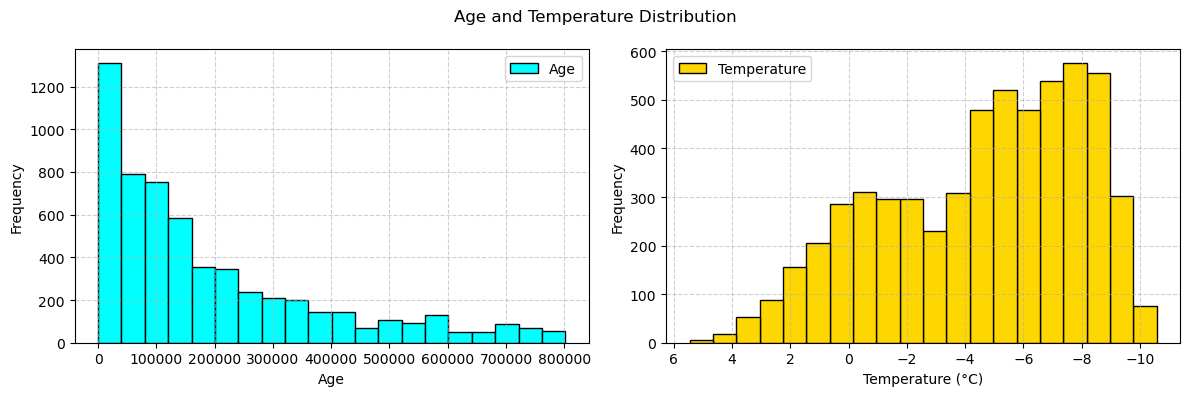

In [5]:
# Histogram for temperature data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Age histogram
axs[0].hist(df['Age'], label="Age", bins=20, color='aqua', edgecolor='black')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
# Add legend 
axs[0].legend()
# Add grid
axs[0].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Temperature histogram
axs[1].hist(df['Temperature'], label="Temperature", bins=20, color= 'gold', edgecolor='black')
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_ylabel('Frequency')
# Add legend 
axs[1].legend()
# Add grid
axs[1].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Addig title
plt.suptitle("Age and Temperature Distribution")

# Adjust layout
plt.tight_layout()

#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Show the plot
plt.show()

# ref: https://stackoverflow.com/questions/68158903/rug-in-seaborn-histplot


In [6]:
#Summary statistics 
df.describe()


,Age,Temperature
count,5785.000000,5785.000000
mean,190506.560624,-4.580228
std,192554.547328,3.446971
min,38.373790,-10.580000
25%,46793.812500,-7.450000
50%,122110.190000,-5.200000
75%,273338.430000,-1.820000
max,801662.000000,5.460000


In [7]:
# Folder location
input_folder = r'C:\Users\PC\DA\PDA_Project_2\data'

# Files names
filename01='41586_2008_BFnature06949_MOESM31_ESM.xls'
filename02='epicaDC.deuttemp.EDC3-AICC.xls'
filename03='grl52461-sup-0003-supplementary.xls'

In [8]:
# READ THE THE SHEETS FROM FILES

# 3 sheets from first file
co2_new = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='1.  new CO2 data',skiprows=6)
vostok = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='2.  Vostok-TD-Dome C',skiprows=6)
co2_composite = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='3.  Composite CO2',skiprows=6)

In [9]:
# Information about the structure of dataset
co2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth (m)          247 non-null    float64
 1   EDC3_gas_a (yr)    247 non-null    int64  
 2   CO2 (ppmv)         247 non-null    float64
 3   sigma (ppmv)       247 non-null    float64
 4   Depth (m).1        47 non-null     float64
 5   EDC3_gas_a (yr).1  47 non-null     float64
 6   CO2 (ppmv).1       47 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 13.6 KB


In [10]:
# Checking first few rows
co2_new.head()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0


In [13]:
# Checking for null entries in each column
null_counts = co2_new.isnull().sum()
# Display the count of null values in each column
print("Null counts in each column:")
print(null_counts)


Null counts in each column:
Depth (m)              0
EDC3_gas_a (yr)        0
CO2 (ppmv)             0
sigma (ppmv)           0
Depth (m).1          200
EDC3_gas_a (yr).1    200
CO2 (ppmv).1         200
dtype: int64


In [16]:
# Removing missing values 
co2_new = co2_new.dropna()
co2_new = co2_new.reset_index(drop=True) 
print(co2_new.isnull().sum())


Depth (m)            0
EDC3_gas_a (yr)      0
CO2 (ppmv)           0
sigma (ppmv)         0
Depth (m).1          0
EDC3_gas_a (yr).1    0
CO2 (ppmv).1         0
dtype: int64


,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.00000
mean,3065.352766,668761.148936,207.825532,1.082979,3148.893617,750698.170213,222.33617
std,12.589708,17487.513476,20.696802,0.476545,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3061.045000,666584.500000,192.050000,0.750000,3130.880000,729879.000000,208.15000
50%,3067.330000,673475.000000,214.000000,1.000000,3160.580000,760338.000000,224.20000
75%,3074.245000,679492.000000,219.850000,1.300000,3174.330000,778397.500000,238.95000
max,3080.520000,684419.000000,257.800000,2.800000,3190.280000,798893.000000,256.60000


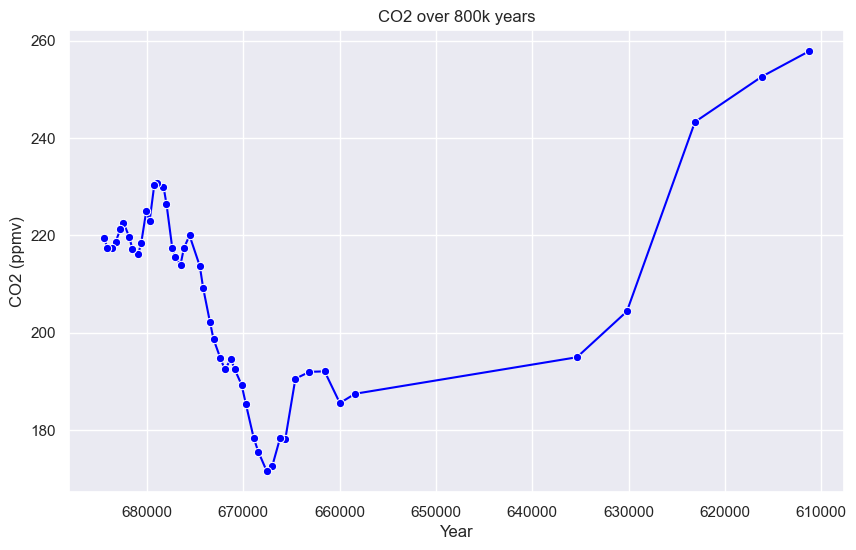

In [43]:
# Reanme column EDC3 as year
co2_new.rename(columns={'EDC3_gas_a (yr)': 'year'}, inplace=True)

# Set Seaborn style 
sns.set_style("darkgrid")

# Add plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=co2_new, x='year', y='CO2 (ppmv)', marker='o', color='blue')

# Add label
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')

# Add title
plt.title('CO2 over 800k years')

# Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Show the plot
plt.show()

#ref :https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial

In [18]:
# Removing missing values 
vostok = vostok.dropna() 
vostok = vostok.reset_index(drop=True)
print(vostok.isnull().sum())

Depth (m)                                      0
EDC3_gas_a (yr)                                0
CO2 (ppmv)                                     0
sigma (ppmv)                                   0
Depth (m).1                                    0
EDC3_gas_a (yr).1                              0
CO2 (ppmv).1                                   0
Depth (m).2                                    0
tentatively synchronized on EDC3_gas_a (yr)    0
CO2 (ppmv).2                                   0
sigma (ppmv).1                                 0
Depth (m).3                                    0
EDC3_gas_a (yr).2                              0
CO2 (ppmv).3                                   0
sigma (ppmv).2                                 0
Depth (m).4                                    0
EDC3_gas_a (yr).3                              0
CO2 (ppmv).4                                   0
Depth (m).5                                    0
EDC3_gas_a (yr).4                              0
CO2 (ppmv).5        

In [215]:
#Information about the structure of dataset
vostok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Depth (m)                                    183 non-null    float64
 1   EDC3_gas_a (yr)                              183 non-null    float64
 2   CO2 (ppmv)                                   183 non-null    float64
 3   sigma (ppmv)                                 183 non-null    float64
 4   Depth (m).1                                  372 non-null    float64
 5   EDC3_gas_a (yr).1                            372 non-null    int64  
 6   CO2 (ppmv).1                                 372 non-null    float64
 7   Depth (m).2                                  73 non-null     float64
 8   tentatively synchronized on EDC3_gas_a (yr)  73 non-null     float64
 9   CO2 (ppmv).2                                 73 non-null     float64
 10  si

In [19]:
# Checking first few rows
vostok.head()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
0,102.83,137.0,280.4,1.8,149.1,2690,284.7,380.82,18906.0,190.5,...,2700.77,392544.0,259.5,3026.58,611269.0,257.8,2.1,3061.71,667435.0,178.5
1,106.89,268.0,274.9,0.7,173.1,3897,272.7,382.42,23379.0,189.1,...,2702.97,393579.0,273.6,3030.97,616164.0,252.6,0.6,3063.98,670124.0,189.0
2,107.20,279.0,277.9,0.7,177.4,4124,268.1,382.76,24011.0,189.0,...,2705.17,394560.0,260.7,3036.44,623109.0,243.3,2.8,3085.78,688035.0,234.0
3,110.25,395.0,279.1,1.3,228.6,6735,262.2,383.54,25337.0,187.7,...,2713.97,398086.0,276.3,3040.87,630183.0,204.4,0.9,3086.88,688751.0,235.4
4,110.50,404.0,281.9,1.1,250.3,7873,254.5,385.33,27507.0,195.2,...,2718.37,399722.0,277.1,3043.07,635364.0,195.0,1.5,3087.98,689444.0,241.0


In [20]:
# Summary statistics 
vostok.describe()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,141.108387,1465.645161,277.983871,0.977419,569.464516,31553.903226,221.716129,397.973226,32450.935484,201.364516,...,2747.750645,410719.483871,274.022581,3059.614839,662321.580645,200.438710,1.093548,3132.926452,733025.161290,214.296774
std,24.306452,858.654550,2.078156,0.331371,289.217713,22096.252497,31.185254,11.767364,5132.373888,8.071082,...,24.854797,9918.306058,7.970350,11.818886,18462.549347,21.880245,0.539095,33.640584,32820.865002,17.620603
min,102.830000,137.000000,273.900000,0.500000,149.100000,2690.000000,182.200000,380.820000,18906.000000,187.700000,...,2700.770000,392544.000000,254.100000,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.500000
25%,120.060000,713.000000,276.700000,0.700000,326.400000,11202.500000,191.650000,388.090000,29505.000000,194.650000,...,2729.370000,403456.000000,271.250000,3057.915000,662348.000000,186.550000,0.700000,3106.745000,704230.000000,200.700000
50%,141.300000,1453.000000,277.900000,0.900000,544.700000,29063.000000,210.400000,396.420000,33161.000000,200.400000,...,2749.170000,410206.000000,275.200000,3062.930000,668934.000000,194.600000,1.000000,3146.370000,744681.000000,216.100000
75%,161.100000,2170.000000,279.100000,1.200000,806.100000,50176.500000,249.650000,408.135000,36789.000000,209.350000,...,2767.870000,418496.000000,278.650000,3067.130000,673285.000000,213.850000,1.350000,3160.030000,759682.500000,227.200000
max,181.450000,2902.000000,282.200000,1.800000,1087.200000,71049.000000,284.700000,418.270000,39100.000000,213.600000,...,2784.370000,426953.000000,285.600000,3071.720000,677380.000000,257.800000,2.800000,3169.380000,771888.000000,241.000000


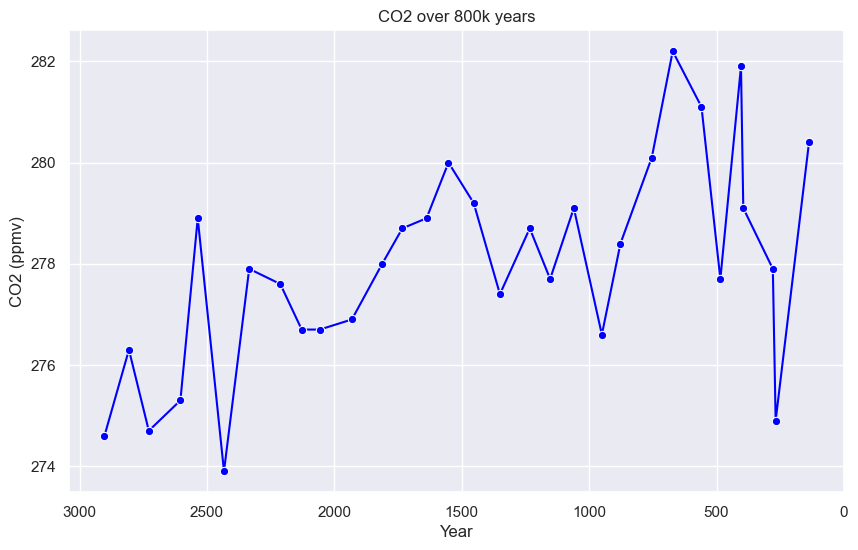

In [42]:
# Reanme column EDC3 as year
vostok.rename(columns={'EDC3_gas_a (yr)': 'year'}, inplace=True)

# Set Seaborn style 
sns.set_style("darkgrid")

# Add plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=vostok, x='year', y='CO2 (ppmv)', marker='o', color='blue')

# Add label
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')

# Add title
plt.title('CO2 over 800k years')

# Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Show the plot
plt.show()

#ref :https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial

In [21]:
#Information about the structure of dataset
co2_composite.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1096 non-null   int64  
 1   CO2 (ppmv)       1096 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [22]:
# Checking first few rows
co2_composite.head()


,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [13]:
# Checking for null entries
print(co2_composite.isnull().sum())

EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64


The output indicates there are no null entries for "year" or "CO2 (ppmv)" columns.

In [14]:
#Summary statistics 
co2_composite.describe()


,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


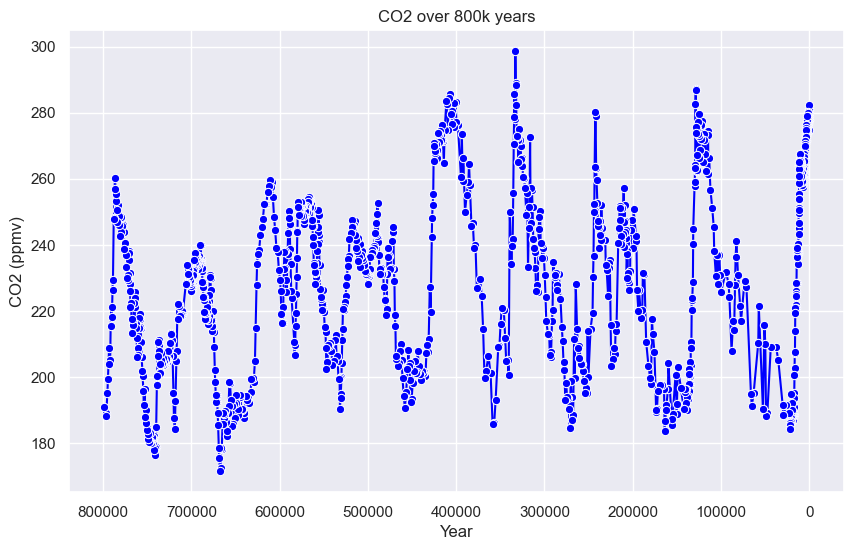

In [44]:
# Reanme column EDC3 as year
co2_composite.rename(columns={'EDC3_gas_a (yr)': 'year'}, inplace=True)

# Set Seaborn style 
sns.set_style("darkgrid")

# Add plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=co2_composite, x='year', y='CO2 (ppmv)', marker='o', color='blue')

# Add label
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')

# Add title
plt.title('CO2 over 800k years')

# Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Show the plot
plt.show()

#ref :https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial

In [49]:
# Second file
epica = pd.read_excel(os.path.join(input_folder,filename02))


In [50]:
epica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [51]:
epica.head()


,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [52]:
# Checking for null entries
print(epica.isnull().sum())

bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64


The column deutfinal has 15 null entries. 

In [53]:
# Removing missing values 
epica = epica.dropna()
epica = epica.reset_index(drop=True) 
print(epica.isnull().sum())


bag             0
ztop            0
EDC3béta        0
AICC2012        0
deutfinal       0
temp            0
acc-EDC3beta    0
dtype: int64


In [54]:
#Droping the rows with null values
epica = epica.dropna(subset=['deutfinal'])


In [55]:
#Summary statistics 
epica.describe()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
count,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000
mean,2917.347864,1603.991325,192294.109034,193210.741532,-417.742884,213.462371,2.042119
std,1675.861031,921.723567,193454.808454,195708.133701,17.949569,3.124649,0.676897
min,13.000000,6.600000,38.517570,31.060000,-450.100000,207.900000,1.096556
25%,1466.750000,806.162500,48009.952500,46996.300000,-432.300000,210.900000,1.508000
50%,2917.500000,1604.075000,123744.150000,121893.500000,-421.300000,212.900000,1.837000
75%,4368.250000,2401.987500,277651.150000,277784.000025,-403.200000,216.000000,2.509084
max,5819.000000,3199.900000,820093.900000,821838.000000,-361.200000,223.100000,4.641000


In [56]:
# Read file
co02_composite02=pd.read_excel(os.path.join(input_folder,filename03),sheet_name='CO2 Composite',skiprows=14)

In [57]:
#Information about the structure of dataset
co02_composite02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


In [23]:
co02_composite02.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [24]:
# Checking for null entries
print(co02_composite02.isnull().sum())

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64


Data does not have missing values in these particular columns.

In [25]:
# Checking column names
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head()) 
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head())

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB
   Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0       -51.030000  368.022488               0.060442
1       -48.000000  361.780737               0.370000
2       -46.279272  359.647793               0.098000
3       -44.405642  357.106740               0.159923
4       -43.080000  353.946685               0.043007
Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):

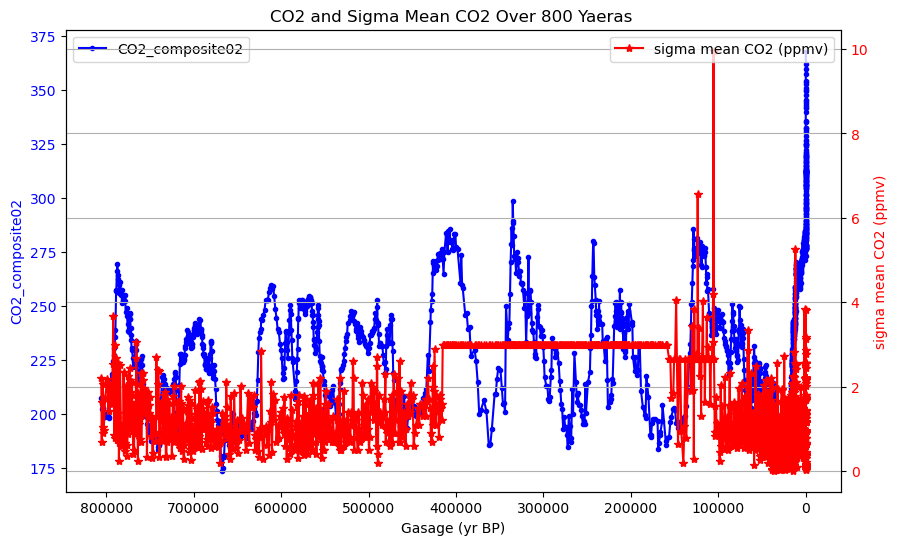

In [26]:
# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Creating plot 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')
ax1.set_xlabel('Gasage (yr BP)')
ax1.set_ylabel('CO2_composite02', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['sigma mean CO2 (ppmv)'], label='sigma mean CO2 (ppmv)', marker='*', color='red')
ax2.set_ylabel('sigma mean CO2 (ppmv)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adding title of plot
plt.title('CO2 and Sigma Mean CO2 Over 800 Yaeras ')
plt.grid(True)
plt.show()


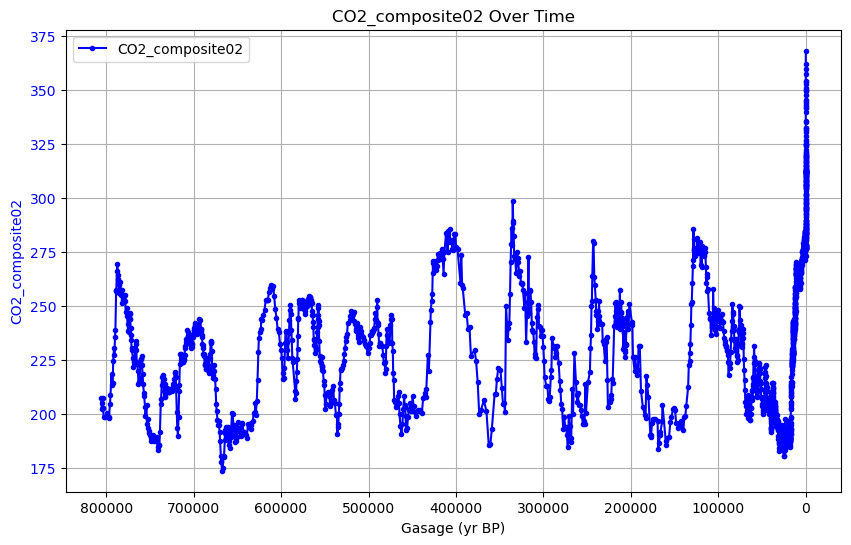

In [135]:
# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CO2 and Gasage on the same axes
ax.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')

# Set labels and legend 
ax.set_xlabel('Gasage (yr BP)')
ax.set_ylabel('CO2_composite02', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.legend(loc='upper left')

#Inverts the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adding title 
plt.title('CO2_composite02 Over Time')
plt.grid(True)
plt.show()


This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.

The EPICA (European Project for Ice Coring in Antarctica) Dome C (EDC) ice core provides the oldest samples of atmospheric air, allowing the reconstruction of CO2 concentrations as far back as 800 kyr B.P. To date, the EDC CO2 record is the only record available for the period from 450 to 800 kyr B.P []


[] https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957

In [27]:
# Read the text file into a DataFrame
file_path = 'data/grl52461-sup-0003-supplementary.xls'
sup_all_records = pd.read_excel(file_path, sheet_name='CO2 Composite', skiprows=14, index_col=None)
sup_all_records


,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [28]:
#Information about the structure of dataset
sup_all_records.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


In [29]:
# Checking for null entries
print(sup_all_records.isnull().sum())

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64


In [30]:
print(sup_all_records.columns)


Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


In [31]:
#Summary statistics 
sup_all_records.describe()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
count,1901.000000,1901.000000,1901.000000
mean,242810.270113,235.566624,1.340519
std,274261.195468,35.902698,0.924188
min,-51.030000,173.713620,0.010000
25%,14606.209000,204.826743,0.639335
50%,74525.645000,232.456008,1.073871
75%,504177.187879,257.930000,1.800000
max,805668.868405,368.022488,9.960000


In [32]:
print(sup_all_records.columns)



Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


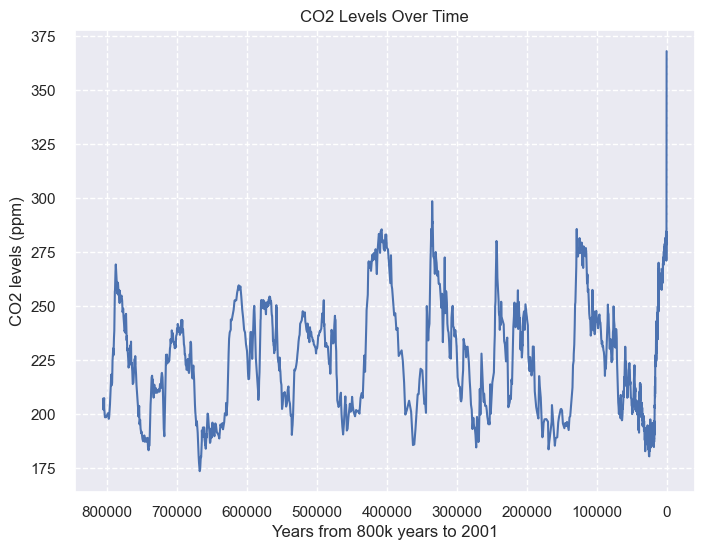

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create plot for datafarme sup_all_records
sup_all_records.columns = sup_all_records.columns.str.strip()

# Set Seaborn Style
sns.set(style="darkgrid", rc={"ytick.major.size": 10, "ytick.minor.size": 2, 'grid.linestyle': '--'})

# Create plot
plt.figure(figsize=(8, 6))

# Plotting using Seaborn
sns.lineplot(data=sup_all_records, x="Gasage (yr BP)", y="CO2 (ppmv)")

# Invert the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adding labels
plt.xlabel('Years from 800k years to 2001')
plt.ylabel('CO2 levels (ppm)')

# Adding title
plt.title('CO2 Levels Over Time')

# Adding grid
plt.grid(True)

# Show the plot
plt.show()

#ref :https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial

In [34]:
print(sup_all_records.columns)


Index(['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')


## Global Land and Ocean Tempereature Anomalies 

The "Global Time Series" dataset presents temperature anomalies with reference to distinct periods. Global and hemispheric anomalies are relative to the 1901-2003 average, coordinate anomalies to the 1991-2023 average, and other regional anomalies to the 1910-2000 average. This analysis aims to visualize and understand temperature fluctuations over time, considering these reference benchmarks. The dataset provides valuable insights into climate patterns, contributing to discussions on climate change mitigation and adaptation[4]. 

[4] Global Time Series, Climate at a Glance: Global Time Series https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/11/1850-2023

In [35]:
#Reading dataset
TemAnomalies = pd.read_csv('data/Global Time Series.csv', skiprows=4)


In [37]:
#Information about the structure of dataset
TemAnomalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     174 non-null    int64  
 1   Anomaly  174 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [38]:
TemAnomalies.head()

,Year,Anomaly
0,1850,-0.14
1,1851,-0.03
2,1852,-0.04
3,1853,-0.13
4,1854,-0.12


In [39]:
# Rename the 'Anomaly' column to 'Temperature'
TemAnomalies = TemAnomalies.rename(columns={'Anomaly': 'Temperature'})
print(TemAnomalies.head())


   Year  Temperature
0  1850        -0.14
1  1851        -0.03
2  1852        -0.04
3  1853        -0.13
4  1854        -0.12


In [40]:
# Checking for null entries
print(TemAnomalies.isnull().sum())

Year           0
Temperature    0
dtype: int64


There is no missng values in dataset for the 'Year' and 'Anomaly' columns 



In [41]:
#Chaning columne Year for Age 
TemAnomalies['Age'] = 1950 - TemAnomalies['Year']


In [43]:
#Summary statistics 
TemAnomalies.describe()

,Year,Temperature,Age
count,174.000000,174.000000,174.000000
mean,1936.500000,0.054023,13.500000
std,50.373604,0.370315,50.373604
min,1850.000000,-0.540000,-73.000000
25%,1893.250000,-0.210000,-29.750000
50%,1936.500000,-0.050000,13.500000
75%,1979.750000,0.185000,56.750000
max,2023.000000,1.440000,100.000000


There are 174 entries in the dataset
Mean: The average is 0.054023
Standard Deviation (std): The standard deviation is approximately 0.370315
The median value is -0.050000


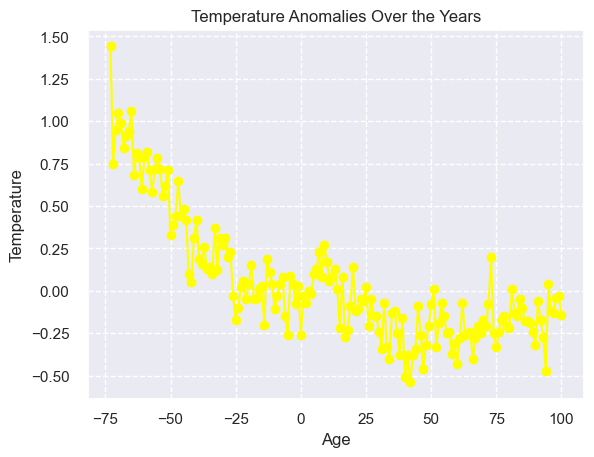

In [42]:
#Creating plot
plt.plot(TemAnomalies['Age'], TemAnomalies['Temperature'], marker='o', linestyle='-', color='yellow')
#Adding title
plt.title('Temperature Anomalies Over the Years')
#Adding labels 
plt.xlabel('Age')
plt.ylabel('Temperature')
#Adding grid 
plt.grid(True)
plt.show()

#* Python Using Matplotlib* https://www.turing.com/kb/exploring-data-visualization-with-python-using-matplotlib

# Irish context 


## The weather data for Dublin Airport from 1971 to 2000



This Dataset contains monthly elements averaged over a 30 year period for some of our synoptic stations. Values for each month including: temperature variables, relative humidity at 09:00 UTC and 15:00 UTC, sunshine in hours, rainfall variables, wind variables and the mean number of days with different weather phenomena[].

[] https://data.europa.eu/data/datasets/723b35f3-afb3-48c4-a5e5-af36f9b6ede6?locale=en

In [44]:
# Read the csv file 
data2 = pd.read_csv('data/dublin_airport_clima.csv', skiprows=1)
data2.head()

,TEMPERATURE (degrees Celsius),Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,mean daily max,7.9,8.1,9.8,11.6,14.4,17.2,19.3,19.0,16.7,13.5,10.2,8.6,13.0
1,mean daily min,2.6,2.7,3.6,4.6,7.0,9.6,11.8,11.5,9.8,7.5,4.4,3.5,6.5
2,mean temperature,5.2,5.4,6.7,8.1,10.7,13.4,15.5,15.3,13.3,10.5,7.3,6.0,9.8
3,absolute max.,16.6,16.2,17.2,20.5,23.4,25.7,27.6,28.7,24.0,21.2,18.0,16.2,28.7
4,min. maximum,-3.8,0.4,1.3,4.4,6.5,10.4,11.7,11.9,10.6,7.5,2.4,-2.0,-3.8


In [45]:
# Checking for null entries
print(data2.isnull().sum())

TEMPERATURE (degrees Celsius)    0
Jan                              5
Feb                              5
Mar                              5
Apr                              5
May                              5
Jun                              5
Jul                              5
Aug                              5
Sep                              5
Oct                              5
Nov                              5
Dec                              5
Year                             5
dtype: int64


The column TEMPERATURE has 0 missing values.
The columns for each month (Jan to Dec) and the Year column each have 5 missing values.

In [46]:
#Information about the structure of dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEMPERATURE (degrees Celsius)  36 non-null     object 
 1   Jan                            31 non-null     float64
 2   Feb                            31 non-null     float64
 3   Mar                            31 non-null     float64
 4   Apr                            31 non-null     float64
 5   May                            31 non-null     float64
 6   Jun                            31 non-null     float64
 7   Jul                            31 non-null     float64
 8   Aug                            31 non-null     float64
 9   Sep                            31 non-null     float64
 10  Oct                            31 non-null     float64
 11  Nov                            31 non-null     float64
 12  Dec                            31 non-null     float

In [47]:
# Drop rows with null values
data2_new = data2.dropna()


In [64]:
# Print the column names
print(data2_new)

           TEMPERATURE (degrees Celsius)   Jan   Feb   Mar   Apr   May   Jun  \
0                         mean daily max   7.9   8.1   9.8  11.6  14.4  17.2   
1                         mean daily min   2.6   2.7   3.6   4.6   7.0   9.6   
2                       mean temperature   5.2   5.4   6.7   8.1  10.7  13.4   
3                          absolute max.  16.6  16.2  17.2  20.5  23.4  25.7   
4                           min. maximum  -3.8   0.4   1.3   4.4   6.5  10.4   
5                           max. minimum  11.8  11.6  11.5  12.8  13.3  16.6   
6                         absolute min.   -8.8  -5.3  -5.4  -4.0  -1.6   2.4   
7      mean num. of days with air frost    6.3   4.5   2.8   1.7   0.3   0.0   
8   mean num. of days with ground frost   15.3  13.4  12.2   9.7   3.7   0.2   
9                          mean 5cm soil   3.5   3.3   4.8   8.0  12.1  15.7   
10                        mean 10cm soil   3.8   3.7   5.0   7.7  11.3  14.8   
11                        mean 20cm soil

In [138]:
print(data2_new.head())

  TEMPERATURE (degrees Celsius)   Jan   Feb   Mar   Apr   May   Jun   Jul  \
0                mean daily max   7.9   8.1   9.8  11.6  14.4  17.2  19.3   
1                mean daily min   2.6   2.7   3.6   4.6   7.0   9.6  11.8   
2              mean temperature   5.2   5.4   6.7   8.1  10.7  13.4  15.5   
3                 absolute max.  16.6  16.2  17.2  20.5  23.4  25.7  27.6   
4                  min. maximum  -3.8   0.4   1.3   4.4   6.5  10.4  11.7   

    Aug   Sep   Oct   Nov   Dec  Year  
0  19.0  16.7  13.5  10.2   8.6  13.0  
1  11.5   9.8   7.5   4.4   3.5   6.5  
2  15.3  13.3  10.5   7.3   6.0   9.8  
3  28.7  24.0  21.2  18.0  16.2  28.7  
4  11.9  10.6   7.5   2.4  -2.0  -3.8  


In [48]:
# Create datafarme
data = {
    'TEMPERATURE (degrees Celsius)': ['mean daily max', 'mean daily min', 'mean temperature', 'absolute max.', 'min. maximum'],
    'Jan': [7.9, 2.6, 5.2, 16.6, -3.8],
    'Feb': [8.1, 2.7, 5.4, 16.2, 0.4],
    'Mar': [9.8, 3.6, 6.7, 17.2, 1.3],
    'Apr': [11.6, 4.6, 8.1, 20.5, 4.4],
    'May': [14.4, 7.0, 10.7, 23.4, 6.5],
    'Jun': [17.2, 9.6, 13.4, 25.7, 10.4],
    'Jul': [19.3, 11.8, 15.5, 27.6, 11.7],
    'Aug': [19.0, 11.5, 15.3, 28.7, 11.9],
    'Sep': [16.7, 9.8, 13.3, 24.0, 10.6],
    'Oct': [13.5, 7.5, 10.5, 21.2, 7.5],
    'Nov': [10.2, 4.4, 7.3, 18.0, 2.4],
    'Dec': [8.6, 3.5, 6.0, 16.2, -2.0],
    'Year': [13.0, 6.5, 9.8, 28.7, -3.8]
}

data2_new = pd.DataFrame(data)

# Create a new column 'Yearly Mean Temperature'
data2_new['Yearly Mean Temperature'] = data2_new.loc[:, 'Jan':'Dec'].mean(axis=1)

# Display the updated DataFrame
print(data2_new[['TEMPERATURE (degrees Celsius)', 'Yearly Mean Temperature']])


#[] *Pandas DataFrame.loc[]* Method https://www.geeksforgeeks.org/python-pandas-dataframe-loc/
#[] *Pandas Mean Axis Argumenthttps* ://stackoverflow.com/questions/58240557/pandas-mean-axis-argument

  TEMPERATURE (degrees Celsius)  Yearly Mean Temperature
0                mean daily max                13.025000
1                mean daily min                 6.550000
2              mean temperature                 9.783333
3                 absolute max.                21.275000
4                  min. maximum                 5.108333


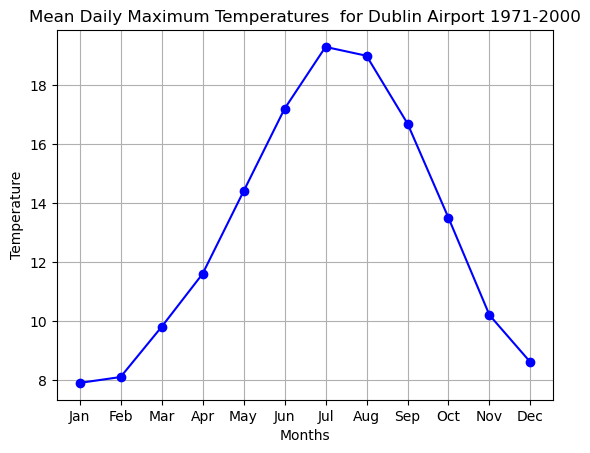

In [68]:
# Extracting relevant data for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Adding the mean daily maximum temperatures for each month
mean_daily_max_temps = [7.9, 8.1, 9.8, 11.6, 14.4, 17.2, 19.3, 19, 16.7, 13.5, 10.2, 8.6]

# Plotting the data
plt.plot(months, mean_daily_max_temps, marker='o', linestyle='-', color='b')

# Adding title 
plt.title('Mean Daily Maximum Temperatures  for Dublin Airport 1971-2000')

# Adding lables
plt.xlabel('Months')
plt.ylabel('Temperature')

# Adding grid
plt.grid(True)
plt.show()


*matplotlib.pyplot.plot* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


Based on the provided weather data for Dublin Airport from 1971 to 2000, the data illustrates the seasonal variation in temperatures throughout the year. The higher mean daily maximum temperatures, peaking in July and August. 

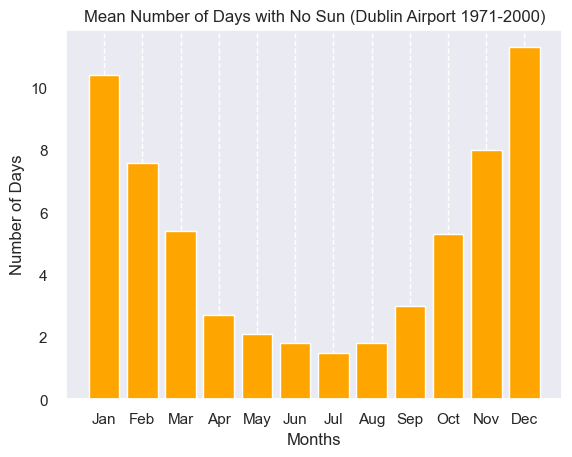

In [49]:
# Extracting relevant data for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
mean_days_with_no_sun = [10.4, 7.6, 5.4, 2.7, 2.1, 1.8, 1.5, 1.8, 3, 5.3, 8, 11.3]

# Plotting the data
plt.bar(months, mean_days_with_no_sun, color='orange')

# Adding title
plt.title('Mean Number of Days with No Sun (Dublin Airport 1971-2000)')

# Adding lables
plt.xlabel('Months')
plt.ylabel('Number of Days')

# Adding grid
plt.grid(axis='y')
plt.show()


The graph shows the number of days without sun per year.
The winter months, especially December and January, have higher values, indicating a greater likelihood of cloudy or overcast conditions during this period.
Summer months such as June and July generally show lower values, suggesting a greater frequency of sunny days during the warmer seasons.


## Global Methane Emissions from 2019 - 2021

The dataset for this project was found on the Kaggle. The website provides real-time statistic on different subjects such a health, media, economics, water, energy, food, government, and word population.

Methane is responsible for around 30% of the rise in global temperatures since the Industrial Revolution, and rapid and sustained reductions in methane emissions are key to limiting near-term global warming and improving air quality. The energy sector – including oil, natural gas, coal and bioenergy – accounts for nearly 40% of methane emissions from human activity.


Ref: https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions/data

In [51]:
# Read the csv file 
methan = pd.read_csv('data/Methan_final.csv', sep=",",header=0)
methan.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [141]:
#Information about the structure of dataset
methan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [52]:
# Checking for null entries in each column
null_counts = methan.isnull().sum()
# Display the count of null values in each column
print("Null counts in each column:")
print(methan)

Null counts in each column:
      Unnamed: 0  region  country      emissions         type  \
0              0  Africa  Algeria     257.611206  Agriculture   
1              1  Africa  Algeria       0.052000       Energy   
2              2  Africa  Algeria     130.798996       Energy   
3              3  Africa  Algeria      69.741898       Energy   
4              4  Africa  Algeria     213.987000       Energy   
...          ...     ...      ...            ...          ...   
1543        1543   World    World    3102.500000       Energy   
1544        1544   World    World   30296.500000       Energy   
1545        1545   World    World  133350.984375       Energy   
1546        1546   World    World    9737.874023        Other   
1547        1547   World    World   70758.710938        Waste   

                                             segment    reason   baseYear  \
0                                              Total       All  2019-2021   
1                                    

In [53]:
# Selecting only the 'emissions' column
emissions_column = methan['emissions']
# Generate descriptive statistics 
emissions_stats = emissions_column.describe()
# Display summary statistics
print(emissions_stats)


count      1548.000000
mean        643.255972
std        5566.238201
min           0.000459
25%           2.659361
50%          24.064669
75%         128.419594
max      141953.765625
Name: emissions, dtype: float64


In [54]:
# Count region values 
methan['region'].value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64

In [55]:
# Filter rows 
europe_agriculture_data = methan[(methan['region'] == 'region') & (methan['type'] == 'Agriculture')]

#Rename the 'baseYear' column to 'year'
europe_agriculture_data = europe_agriculture_data.rename(columns={'baseYear': 'year'})

# Select the 'emissions' and 'year' columns
selected_agriculture_data = europe_agriculture_data[['emissions', 'year']]

# Display 
print(selected_agriculture_data)


# REf https://blog.hubspot.com/website/filter-rows-pandas

Empty DataFrame
Columns: [emissions, year]
Index: []


In [146]:
# Group columns 
grouped_data = methan.groupby('region').agg({'emissions': 'sum', 'baseYear': 'nunique'}).reset_index()

# Display the grouped data
print("Grouped Data:")
print(grouped_data)

# Ref: https://stackoverflow.com/questions/52330016/pandas-reset-index-after-performing-groupby-and-retain-selective-columns
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html        
        

Grouped Data:
                      region      emissions  baseYear
0                     Africa   54197.152613         2
1               Asia Pacific  177699.611465         2
2  Central and South America   45639.989799         2
3                     Europe   49208.996818         2
4                Middle East   38095.798763         2
5              North America   63347.409177         2
6                      Other   15997.357175         2
7           Russia & Caspian   62421.612360         2
8                      World  489152.316956         2


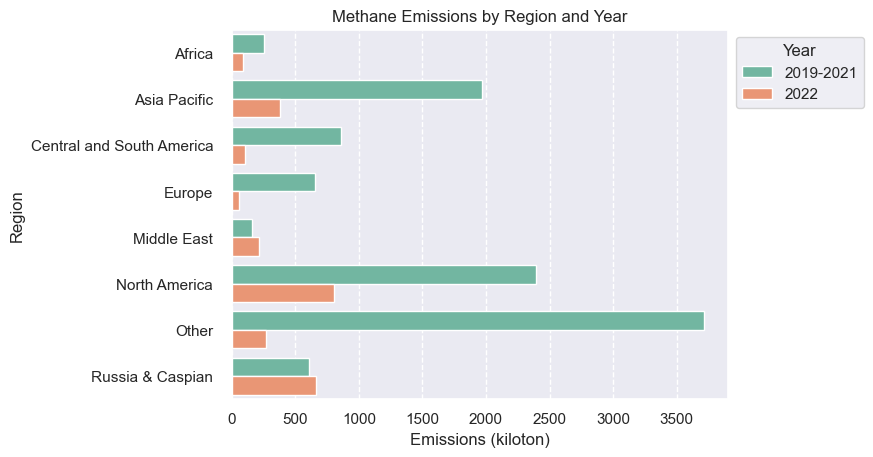

In [56]:
# Create a copy of the 'methan' DataFrame
df_copy_methan = methan.copy()

# Exclude the "World" region
df_copy_methan = methan[~(methan["region"] == "World")]

# Set up a color palette if 'baseYear' is categorical
colors = "Set2"  # You can change this to a different seaborn color palette if needed

# Create the bar plot
sns.barplot(data=df_copy_methan, y="region", x="emissions", hue="baseYear", errorbar=None, palette=colors)

# Customize the plot
plt.title("Methane Emissions by Region and Year")
plt.xlabel("Emissions (kiloton)")
plt.ylabel("Region")
plt.legend(title="Year", bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()


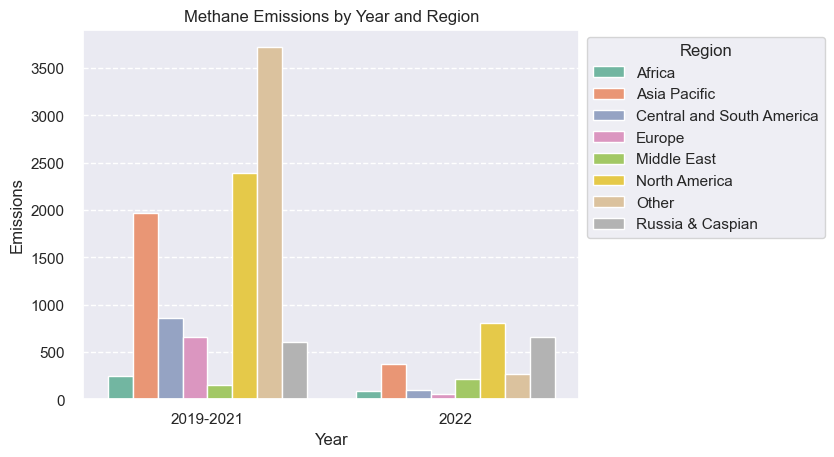

In [147]:
# Create dataframe
df_copy_methan = methan.copy()

# Exclude the "World" region
df_copy_methan = methan[~(methan["region"] == "World")]

# Set up a color palette
colors = "Set2"  

# Create the bar plot
sns.barplot(data=df_copy_methan, x="baseYear", y="emissions", hue="region", errorbar=None, palette=colors)

# Adding ttile 
plt.title("Methane Emissions by Year and Region")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(title="Region", bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()


## Met Éireann 1961-1990 Climate averages

The "Met Éireann 1961-1990 Climate Averages" dataset is published by Met Éireann and falls under the category of Environment. It provides monthly averages for a 30-year period at various synoptic stations in Ireland.

This dataset contains monthly elements averaged over a 30 year period for some of our synoptic stations. Values for each month include: temperature variables, relative humidity at 09:00 UTC and 15:00 UTC, sunshine in hours, rainfall variables, wind variables and the mean number of days with different weather phenomena[].

Ref : https://data.gov.ie/dataset/met-eireann-1961-1990-climate-averages

In [57]:
# Read the csv file 
climate = pd.read_csv('data/belmullet_climate_averages_1961_1990.csv', sep=",",header=0, skiprows=1)
climate.head()

,TEMPERATURE (degrees Celsius),Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,mean daily max.,8.2,8.3,9.7,11.6,13.7,15.7,16.8,17.2,15.7,13.4,10.3,9.0,12.5
1,mean daily min.,3.1,2.9,3.9,4.9,7.0,9.5,11.1,11.1,9.8,8.2,5.1,4.3,6.7
2,mean,5.7,5.6,6.8,8.2,10.3,12.6,14.0,14.1,12.8,10.8,7.7,6.6,9.6
3,absolute max.,13.0,13.8,19.4,23.3,26.0,27.0,28.7,27.4,22.4,22.1,15.2,13.5,28.7
4,absolute min.,-8.1,-6.3,-5.7,-2.6,-0.4,1.4,5.1,3.1,0.8,-0.7,-2.5,-5.2,-8.1


In [58]:
# Checking for null entries
print(climate.isnull().sum())

TEMPERATURE (degrees Celsius)     5
Jan                              10
Feb                              10
Mar                              10
Apr                              10
May                              10
Jun                              10
Jul                              10
Aug                              10
Sep                              10
Oct                              10
Nov                              10
Dec                              10
Year                             10
dtype: int64


In [59]:
#Information about the structure of dataset
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEMPERATURE (degrees Celsius)  31 non-null     object 
 1   Jan                            26 non-null     float64
 2   Feb                            26 non-null     float64
 3   Mar                            26 non-null     float64
 4   Apr                            26 non-null     float64
 5   May                            26 non-null     float64
 6   Jun                            26 non-null     float64
 7   Jul                            26 non-null     float64
 8   Aug                            26 non-null     float64
 9   Sep                            26 non-null     float64
 10  Oct                            26 non-null     float64
 11  Nov                            26 non-null     float64
 12  Dec                            26 non-null     float

In [60]:
# Drop rows with null values
climate2 = climate.dropna()

In [61]:
# Print the column names
print(climate2)

         TEMPERATURE (degrees Celsius)     Jan    Feb    Mar    Apr    May  \
0                      mean daily max.    8.20   8.30   9.70  11.60  13.70   
1                      mean daily min.    3.10   2.90   3.90   4.90   7.00   
2                                 mean    5.70   5.60   6.80   8.20  10.30   
3                        absolute max.   13.00  13.80  19.40  23.30  26.00   
4                        absolute min.   -8.10  -6.30  -5.70  -2.60  -0.40   
5      mean no. of days with air frost    5.00   4.30   2.10   0.90   0.00   
6   mean no. of days with ground frost   10.50   9.50   7.30   5.40   1.90   
9                      mean at 0900UTC   85.00  84.00  82.00  80.00  78.00   
10                     mean at 1500UTC   81.00  77.00  75.00  73.00  73.00   
13                 mean daily duration    1.47   2.41   3.29   5.27   6.14   
14             greatest daily duration    7.90   9.80  11.20  14.00  15.60   
15        mean no. of days with no sun   10.00   6.00   5.00   3

In [62]:
# Print the column names of the DataFrame
print(climate2.columns)


Index(['TEMPERATURE (degrees Celsius)', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year'],
      dtype='object')


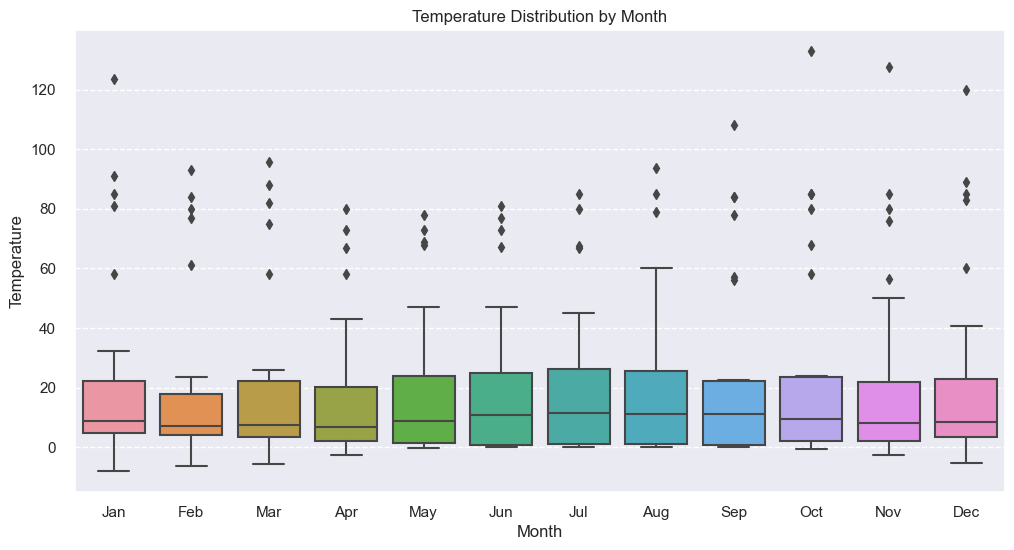

In [63]:
# Extracting temperature columns
temperature_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creating a new DataFrame for temperature data
temperature_data = climate2[temperature_columns]

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=temperature_data)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()


##  

##  Data Visualization for Temperature and CO2 Levels Over 8000 Years

In [64]:
print(co2_composite.columns)


Index(['year', 'CO2 (ppmv)'], dtype='object')


In [196]:
co2_composite.head()

,year,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [65]:
df.head()

,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42


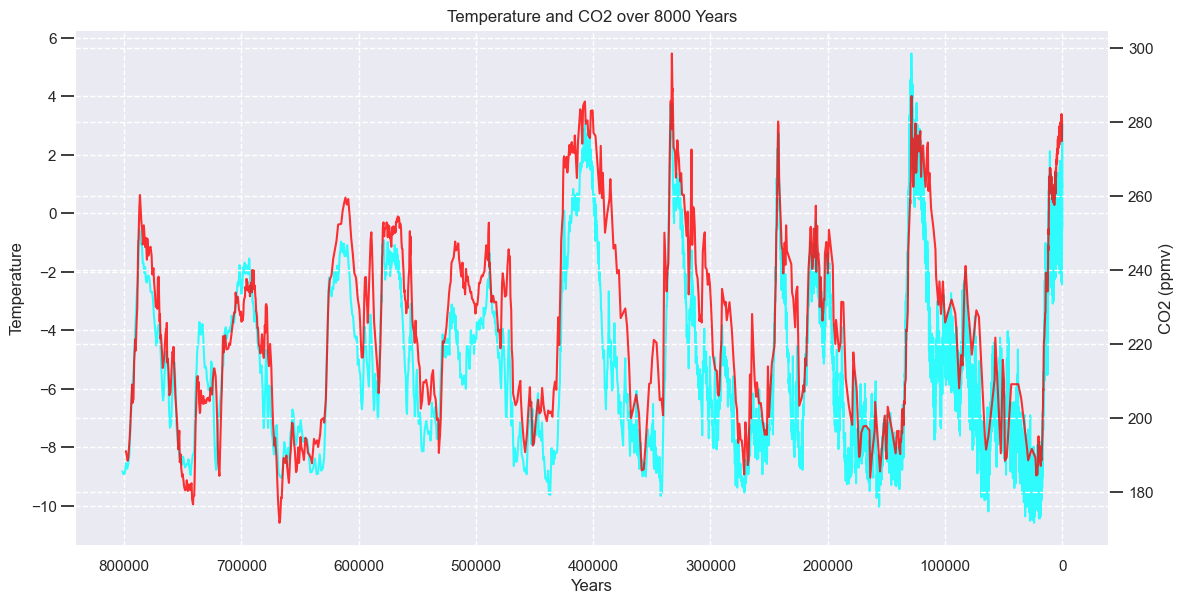

In [66]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot for temperature
ax1.plot(df['Age'], df['Temperature'], label='Temperature', color='aqua', alpha=0.8)
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature')

# Plot for CO2 
ax2.plot(co2_composite['year'], co2_composite['CO2 (ppmv)'], label='CO2 (ppmv)', color='red', alpha=0.8)
ax2.set_ylabel('CO2 (ppmv)')

# Invert the x-axis, making the latest years appear on the right
plt.gca().invert_xaxis()

# Adjust layout and show the plot
fig.tight_layout()
# Adding title
plt.title('Temperature and CO2 over 8000 Years')
plt.show()


# ref https://stackoverflow.com/questions/46956762/matplotlib-several-subplots-and-axes
# ref https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

The provided code creates a two-axis graph visualizing the relationship between temperature and CO2 levels over 8,000 years. The primary y-axis shows temperature, plotted in aqua, while the secondary y-axis shows CO2 levels, plotted in red. The x-axis, representing years, is flipped to display recent years on the right. By using dual axes, it allows for a more complete understanding of potential correlations or patterns between two variables.

## Correlation


Correlation analysis is a powerful statistical technique used to assess the strength and direction of association between two variables.

Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship[]. 

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

In [271]:
# Calculate the correlation
correlation = temperature_column.corr(co2_column)

# Print the correlation coefficient
print(f"Correlation coefficient between Temperature and CO2 (ppmv): {correlation}")


Correlation coefficient between Temperature and CO2 (ppmv): 0.33458634081058536


The correlation coefficient of 0.3346 indicates a positive correlation between temperature and CO2 levels in the atmosphere. Positive correlation means that when one variable increases, the other variable also tends to increase. In this context, this suggests that there is a positive relationship between global temperature and atmospheric CO2 concentration.

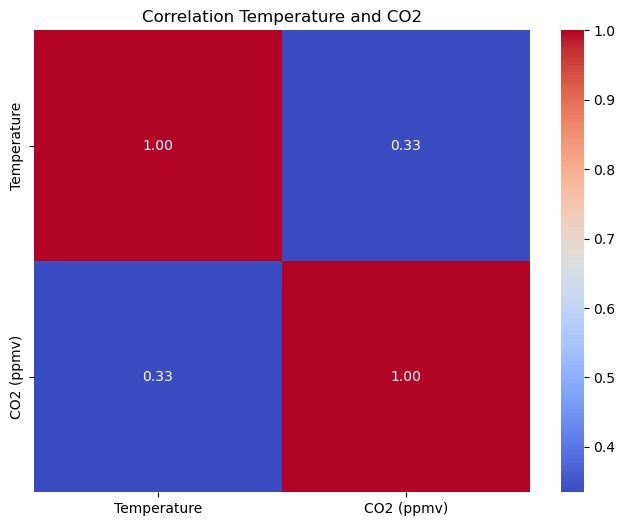

In [268]:
# Adding correlation 
correlation_df = pd.concat([df['Temperature'], co2_composite['CO2 (ppmv)']], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot for  heatmap for the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Adding title
plt.title('Correlation Temperature and CO2')
plt.show()


# ref https://realpython.com/numpy-scipy-pandas-correlation-python/
# ref https://www.tutorialspoint.com/how-to-create-a-seaborn-correlation-heatmap-in-python#:~:text=Users%20may%20use%20Seaborn's%20load,method%20to%20produce%20the%20heatmap.


## Predictions for atmospheric CO2 levels and global temperature anomaly




Understanding the complex interactions between atmospheric carbon dioxide (CO2) levels and global temperature anomalies is crucial to assessing the potential impacts of climate change. Over the past decades, many factors have influenced the Earth's climate, and one of the key factors has been the increasing concentration of CO2.
A simple linear regression model is used to predict global temperature anomalies based on synthetic CO2 data. While this is a simplified model, it serves as a starting point for understanding potential trends in a changing climate.
To validate and contextualize our predictions, we plan to compare our synthesized data with the results of established climate models used by the scientific community. This comparative analysis aims to assess the robustness and reliability of our predictions compared to more sophisticated models that take into account a wider range of climate variables.

We use <code>LinearRegression</code> is to create a simple linear regression model. 
The LinearRegression model assumes a linear relationship between the independent variable (CO2 levels in this case) and the dependent variable (global temperature anomalies). 
The <code>train_test_split function</code> from scikit-learn is commonly used to split a dataset into training and testing sets.
The <code>mean_squared_error</code> function evaluates the performance of a regression model by calculating the mean squared error (MSE) between the predicted values and the actual value.

Mean Squared Error: 0.03832135991899582


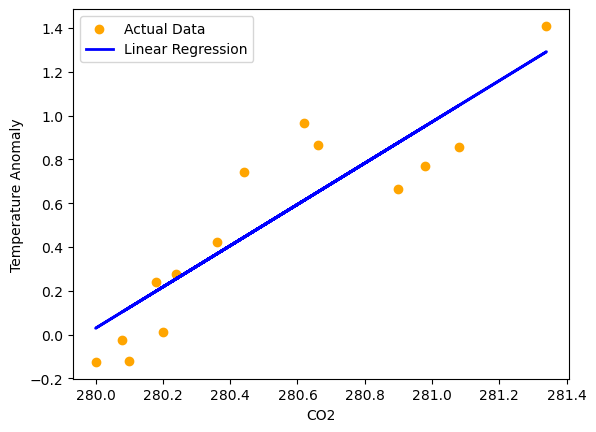

In [288]:
# Importing library 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data for atmospheric CO2 levels and global temperature anomaly
years = np.arange(1960, 2030, 1)
co2_levels = 280 + 0.02 * (years - 1960)
temperature_anomaly = 0.02 * (years - 1960) + np.random.normal(0, 0.2, len(years))

# Use only the temperature as the target variable
y = temperature_anomaly

# Reshape the CO2 levels data to a column vector
X = co2_levels.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the original data and the linear regression line
plt.scatter(X_test, y_test, color='orange', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('CO2')
plt.ylabel('Temperature Anomaly')
#Adding legend
plt.legend()
plt.show()



# ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# ref :https://www.machinelearningnuggets.com/python-linear-regression/
# ref https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# ref https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
# ref https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# ref https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.metrics.mean_squared_error


A mean squared error (MSE) value of 0.0461 indicates the mean squared difference between the actual and predicted CO2 levels in the test set. A lower MSE generally suggests that the model predictions are closer to the actual values.

## Conclusion

The goal of this project was to predict the global temperature anomaly over the next few decades by synthesizing data and comparing the results with published climate models, taking into account current trends in atmospheric CO2 concentrations. Through a comprehensive analysis and modeling approach, this study aims to gain insight into potential future climate scenarios, highlighting the impact of persistent CO2 emissions on global temperature patterns. 

Synthetic data generated for atmospheric CO2 concentrations and corresponding temperature anomalies allowed us to simulate a simplified representation of the relationship between these variables.

The linear regression model showed as evidenced by a mean squared error (MSE) of 0.0383 on the test set. This small MSE suggests that the model successfully captured the underlying patterns and trends in the data, producing reasonably accurate forecasts of temperature anomalies based on the given CO2 levels.

Taken together, this study represents a fundamental step in predicting temperature anomalies from CO2 concentrations, providing a framework for future research aimed at improving climate models and better understanding the complex interplay between greenhouse gas emissions and global climate patterns.



### Referecne:
    
[1]. Ice cores and climate change, British Antarctic Survey (BAS) https://www.bas.ac.uk/data/our-data/publication/ice-cores-and-climate-change/    

[2].The EPICA deep ice cores,Cambridge University Press 2024 https://www.cambridge.org/core/journals/annals-of-glaciology/article/epica-deep-ice-cores-first-results-and-perspectives/BFC6D11388E8723E5B6BE0978A39201B#

[3]. Data Publisher for Earth & Environmental Science,  Earth & Environmental Science. Scientific Data, 10(1), 347, https://doi.pangaea.de/10.1594/PANGAEA.683655

[4]. Global Time Series, Climate at a Glance: Global Time Series https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/11/1850-2023

### Additional Reading 

*Data Frame GroupBy*, NumFOCUS, Inc, https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html    
 
Kaggle,Dataset,  https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions/data
  
 
*Data Frame Group*, STACK OVERFLOW, https://stackoverflow.com/questions/52330016/pandas-reset-index-after-performing-groupby-and-retain-selective-columns


*Pandas.DataFrame.drop,Pandas*, GeeksforGeeks, https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.drop.html
 
 
*Count NaN values*,GeeksforGeek https://www.geeksforgeeks.org/how-to-count-the-number-of-nan-values-in-pandas/ 


*Seaborn Histplot*, DataCamp :https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial



*Seaborn Histplot*,STACK OVERFLOW https://stackoverflow.com/questions/68158903/rug-in-seaborn-histplot

*Correlation*, Statistics Solutions 2024: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman

*Correlation*, Real Python  https://realpython.com/numpy-scipy-pandas-correlation-python/
 
*How to Filter Rows in Pandas*, HubSpot,  https://blog.hubspot.com/website/filter-rows-pandas

*Met Éireann* , Met Éireann 1961-1990 Climate averages,  https://data.gov.ie/dataset/met-eireann-1961-1990-climate-averages
 
*LinearRegression*,  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
 
*Linear regression in Python* , Ghost & Krabi https://www.machinelearningnuggets.com/python-linear-regression/

*Train_test_spli*, BSD  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
 
*Train_test_spli*, GeeksforGeeks https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/

*Mean_squared_error*, BSD, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
 
*Train_test_split()* https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.metrics.mean_squared_error

*Subplots and axes*, STACK OVERFLOW  https://stackoverflow.com/questions/46956762/matplotlib-several-subplots-and-axes

*Secondary axis with twinx*, STACK OVERFLOW  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

